#### Load dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("./CleanedDataset/DrDoS_DNS.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0,425,634,60495,17,28415,97,0,42680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,1,430,634,60495,17,2,2,0,880.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,2,1654,634,46391,17,48549,200,0,88000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,3,2927,634,11894,17,48337,200,0,88000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,4,694,634,27878,17,32026,200,0,88000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


In [12]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [14]:
infinities = np.isinf(df)
infinities.sum().sum()

0

In [15]:
y = df["Label"]
X = df.drop(["Label"], axis=1)

In [16]:
X.shape

(4912019, 83)

#### Feature Selection

In [17]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 83,
                                        criterion ='entropy', max_features = 30)
 
extra_tree_forest.fit(X, y)

ExtraTreesClassifier(criterion='entropy', max_features=30, n_estimators=83)

In [18]:
feature_importance = extra_tree_forest.feature_importances_
 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)


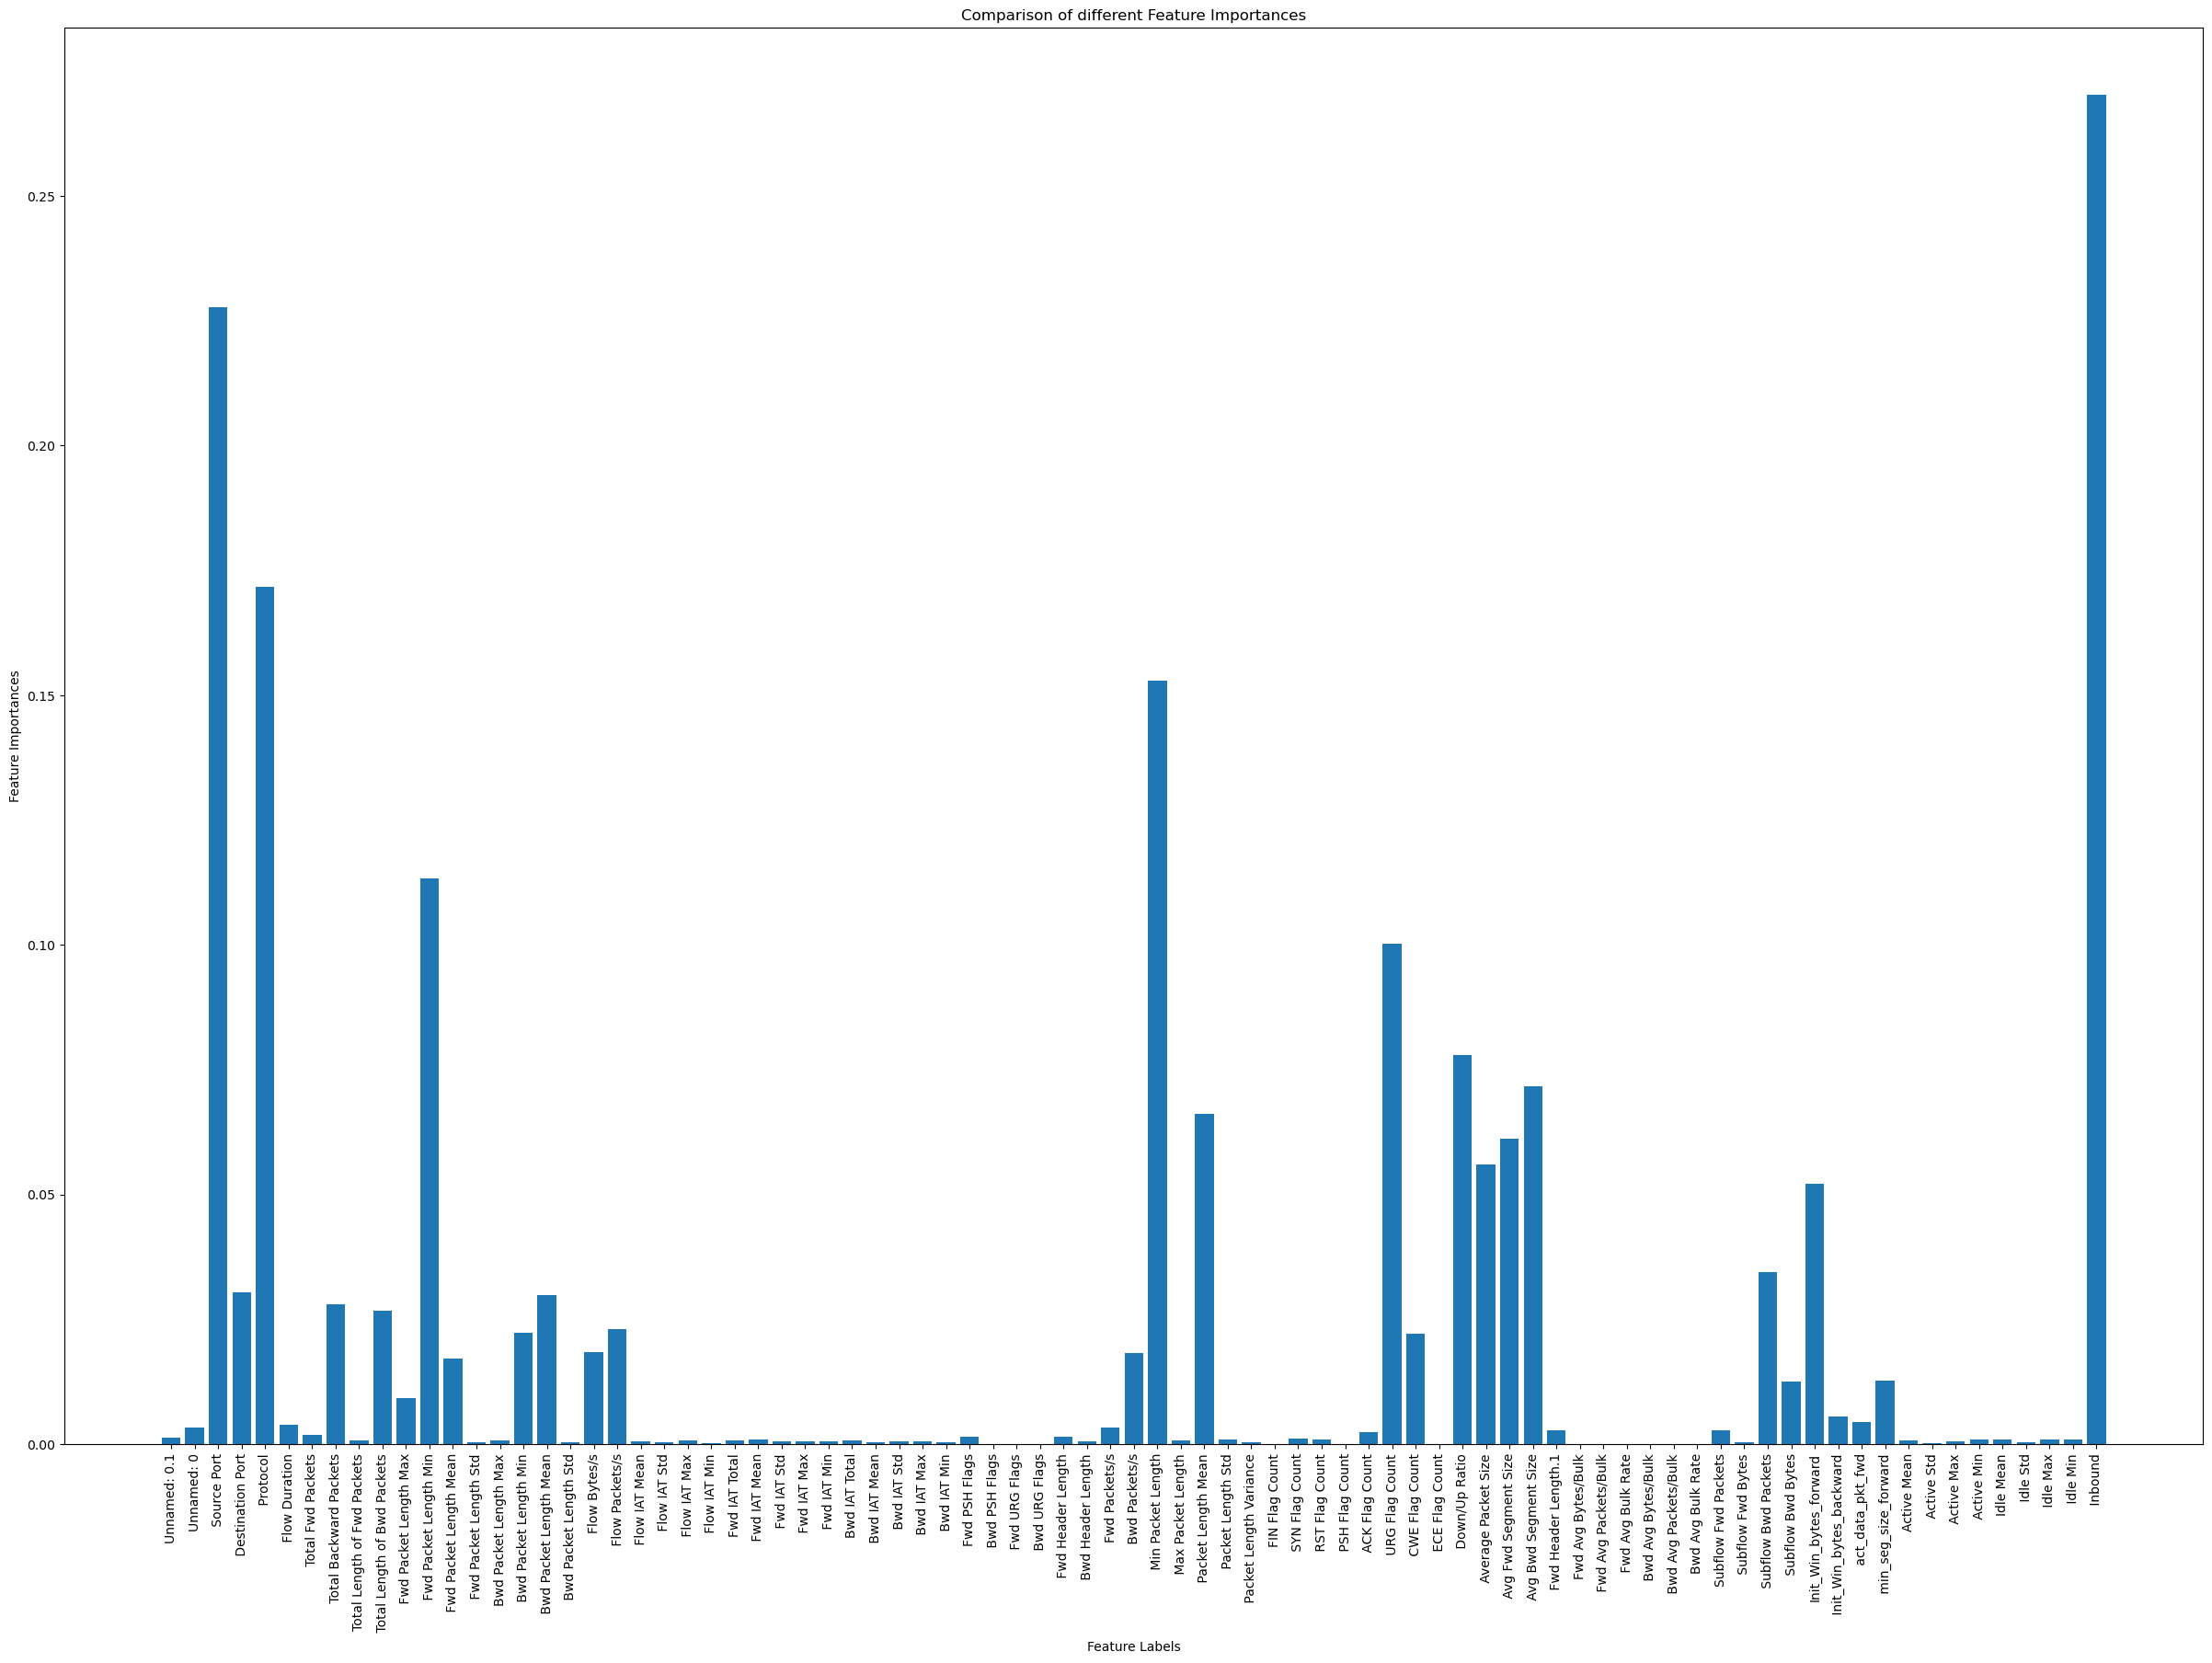

In [28]:
plt.figure(figsize=(30, 20))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.xticks(rotation=90)
plt.title('Comparison of different Feature Importances')
plt.show()

In [35]:
type(X.columns), type(feature_importance_normalized)

(pandas.core.indexes.base.Index, numpy.ndarray)

In [49]:
coeff = pd.Series(feature_importance_normalized, name = 'value' )

In [51]:
col_name = pd.Series(X.columns, name='name')

In [52]:
dff = pd.concat([col_name, coeff], axis=1)

In [53]:
new_dff = dff.drop(0)

In [54]:
new_dff

,name,value
1,Unnamed: 0,0.003298
2,Source Port,0.227652
3,Destination Port,0.030437
4,Protocol,0.171716
5,Flow Duration,0.003776
...,...,...
78,Idle Mean,0.000892
79,Idle Std,0.000358
80,Idle Max,0.000891
81,Idle Min,0.000876


In [57]:
sorted_df = new_dff.sort_values(by='value', ascending=False)

In [62]:
columns = sorted_df.head(25)["name"]

In [63]:
columns

82                         Inbound
2                      Source Port
4                         Protocol
42               Min Packet Length
11           Fwd Packet Length Min
52                  URG Flag Count
55                   Down/Up Ratio
58            Avg Bwd Segment Size
44              Packet Length Mean
57            Avg Fwd Segment Size
56             Average Packet Size
70          Init_Win_bytes_forward
68             Subflow Bwd Packets
3                 Destination Port
16          Bwd Packet Length Mean
7           Total Backward Packets
9      Total Length of Bwd Packets
19                  Flow Packets/s
15           Bwd Packet Length Min
53                  CWE Flag Count
18                    Flow Bytes/s
41                   Bwd Packets/s
12          Fwd Packet Length Mean
73            min_seg_size_forward
69               Subflow Bwd Bytes
Name: name, dtype: object

In [64]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,0,425,634,60495,17,28415,97,0,42680.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,1,430,634,60495,17,2,2,0,880.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,2,1654,634,46391,17,48549,200,0,88000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,3,2927,634,11894,17,48337,200,0,88000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,4,694,634,27878,17,32026,200,0,88000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [66]:
selected_df = df[columns]

In [67]:
selected_df.head()

,Inbound,Source Port,Protocol,Min Packet Length,Fwd Packet Length Min,URG Flag Count,Down/Up Ratio,Avg Bwd Segment Size,Packet Length Mean,Avg Fwd Segment Size,...,Total Backward Packets,Total Length of Bwd Packets,Flow Packets/s,Bwd Packet Length Min,CWE Flag Count,Flow Bytes/s,Bwd Packets/s,Fwd Packet Length Mean,min_seg_size_forward,Subflow Bwd Bytes
0,1,634,17,440.0,440.0,0,0.0,0.0,440.0,440.0,...,0,0.0,3413.689952,0.0,0,1.502024e+06,0.0,440.0,-1,0
1,0,634,17,440.0,440.0,0,0.0,0.0,440.0,440.0,...,0,0.0,1000000.000000,0.0,0,4.400000e+08,0.0,440.0,-1,0
2,1,634,17,440.0,440.0,0,0.0,0.0,440.0,440.0,...,0,0.0,4119.549321,0.0,0,1.812602e+06,0.0,440.0,-1,0
3,1,634,17,440.0,440.0,0,0.0,0.0,440.0,440.0,...,0,0.0,4137.617146,0.0,0,1.820552e+06,0.0,440.0,-1,0
4,1,634,17,440.0,440.0,0,0.0,0.0,440.0,440.0,...,0,0.0,6244.925998,0.0,0,2.747767e+06,0.0,440.0,-1,0


#### MinMax Normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [70]:
df_scaled = scaler.fit_transform(selected_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=selected_df.columns)

In [71]:
df_scaled.head()

,Inbound,Source Port,Protocol,Min Packet Length,Fwd Packet Length Min,URG Flag Count,Down/Up Ratio,Avg Bwd Segment Size,Packet Length Mean,Avg Fwd Segment Size,...,Total Backward Packets,Total Length of Bwd Packets,Flow Packets/s,Bwd Packet Length Min,CWE Flag Count,Flow Bytes/s,Bwd Packets/s,Fwd Packet Length Mean,min_seg_size_forward,Subflow Bwd Bytes
0,1.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.0,0.000853,0.0,0.0,0.000510,0.0,0.145923,0.999999,0.0
1,0.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.0,0.250000,0.0,0.0,0.149457,0.0,0.145923,0.999999,0.0
2,1.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.0,0.001030,0.0,0.0,0.000616,0.0,0.145923,0.999999,0.0
3,1.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.0,0.001034,0.0,0.0,0.000618,0.0,0.145923,0.999999,0.0
4,1.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.0,0.001561,0.0,0.0,0.000933,0.0,0.145923,0.999999,0.0


In [72]:
X, y = df_scaled, df["Label"] 

In [73]:
X.shape, y.shape

((4912019, 25), (4912019,))

#### Splitting dataset

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3291052, 25), (1620967, 25), (3291052,), (1620967,))

#### Train LinearSVC, DecisionTreeClassifier and RandomForestClassifier algorithms

In [85]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

linear_svc_model = LinearSVC(C=1.0, loss='squared_hinge', penalty='l2')
dtc_model = DecisionTreeClassifier(criterion='gini', min_samples_split=3)
rfc_model = RandomForestClassifier(criterion='gini', min_samples_split=3)


In [86]:
lsvc_start = time.time() 
linear_svc_model.fit(X_train, y_train)
lsvc_train_time = time.time() - lsvc_start


dtc_start = time.time()
dtc_model.fit(X_train, y_train)
dtc_train_time = time.time() - dtc_start


rfc_start = time.time()
rfc_model.fit(X_train, y_train)
rfc_train_time = time.time() - rfc_start

C:\Users\admin\anaconda3\envs\ddos\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [87]:
print(lsvc_train_time)
print(dtc_train_time)
print(rfc_train_time)

9.497204065322876
15.4827241897583
317.63249158859253


In [100]:
lsvc_start = time.time() 
y_svc_pred = linear_svc_model.predict(X_test)
lsvc_pred_time = time.time() - lsvc_start


dtc_start = time.time()
y_dtc_pred = dtc_model.predict(X_test)
dtc_pred_time = time.time() - dtc_start


rfc_start = time.time()
y_rfc_pred = rfc_model.predict(X_test)
rfc_pred_time = time.time() - rfc_start


In [101]:
print(lsvc_pred_time, X_test.shape)
print(dtc_pred_time, X_test.shape)
print(rfc_pred_time, X_test.shape)

0.09581923484802246 (1620967, 25)
0.1766982078552246 (1620967, 25)
4.907664775848389 (1620967, 25)


#### Model performance, Metircs

In [102]:
acc_svc = linear_svc_model.score(X_test, y_test)
acc_dtc = dtc_model.score(X_test, y_test)
acc_rfc = rfc_model.score(X_test, y_test)

In [103]:
print(acc_svc)
print(acc_dtc)
print(acc_rfc)

0.9997791441775187
0.9999901293487159
0.9999956815900632


In [104]:
from sklearn.metrics import classification_report

In [105]:
clr_svc = classification_report(y_test, y_svc_pred)
clr_dtc = classification_report(y_test,y_dtc_pred)
clr_rfc = classification_report(y_test, y_rfc_pred)

In [106]:
print(clr_svc)
print(clr_dtc)
print(clr_rfc)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1098
           1       1.00      1.00      1.00   1619869

    accuracy                           1.00   1620967
   macro avg       0.92      0.91      0.92   1620967
weighted avg       1.00      1.00      1.00   1620967

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1098
           1       1.00      1.00      1.00   1619869

    accuracy                           1.00   1620967
   macro avg       1.00      1.00      1.00   1620967
weighted avg       1.00      1.00      1.00   1620967

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1098
           1       1.00      1.00      1.00   1619869

    accuracy                           1.00   1620967
   macro avg       1.00      1.00      1.00   1620967
weighted avg       1.00      1.00      1.00   1620967



#### Saving machine learning models with pickle

In [107]:
from joblib import dump

In [108]:
dump(linear_svc_model, "./models/linear_svc.joblib")
dump(dtc_model, "./models/decision_tree.joblib")
dump(rfc_model, "./models/random_forest.joblib")

['./models/random_forest.joblib']

In [111]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [115]:
filtered_df = pd.concat([X, y], axis=1)

In [116]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [117]:
filtered_df.head()

,Inbound,Source Port,Protocol,Min Packet Length,Fwd Packet Length Min,URG Flag Count,Down/Up Ratio,Avg Bwd Segment Size,Packet Length Mean,Avg Fwd Segment Size,...,Total Length of Bwd Packets,Flow Packets/s,Bwd Packet Length Min,CWE Flag Count,Flow Bytes/s,Bwd Packets/s,Fwd Packet Length Mean,min_seg_size_forward,Subflow Bwd Bytes,Label
0,1.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.000853,0.0,0.0,0.000510,0.0,0.145923,0.999999,0.0,1.0
1,0.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.250000,0.0,0.0,0.149457,0.0,0.145923,0.999999,0.0,1.0
2,1.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.001030,0.0,0.0,0.000616,0.0,0.145923,0.999999,0.0,1.0
3,1.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.001034,0.0,0.0,0.000618,0.0,0.145923,0.999999,0.0,1.0
4,1.0,0.009678,1.0,0.298913,0.217822,0.0,0.0,0.0,0.165273,0.145923,...,0.0,0.001561,0.0,0.0,0.000933,0.0,0.145923,0.999999,0.0,1.0


In [118]:
filtered_df.to_csv("./CleanedDataset/filtered_dataset.csv")